In [43]:
import sys, importlib, os

# Parent directory that contains both trodes and LFP
EPHYS_ROOT = "/home/t.heeps/blue_npadillacoreano/npadillacoreano/t.heeps/rehouse_code/ephys_analysis"
sys.path.insert(0, EPHYS_ROOT)

import pandas as pd
import numpy as np
from collections import defaultdict

# Printing the search path to see what it's looking at
print(sys.path)

# importing ephys analysis code
import trodes.read_exported as tr
from LFP.lfp_collection import LFPCollection

['/home/t.heeps/blue_npadillacoreano/npadillacoreano/t.heeps/rehouse_code/ephys_analysis', '/home/t.heeps/blue_npadillacoreano/npadillacoreano/t.heeps/rehouse_code/ephys_analysis', '/blue/npadillacoreano/t.heeps/.conda/envs/lfp_export_env/lib/python310.zip', '/blue/npadillacoreano/t.heeps/.conda/envs/lfp_export_env/lib/python3.10', '/blue/npadillacoreano/t.heeps/.conda/envs/lfp_export_env/lib/python3.10/lib-dynload', '', '/blue/npadillacoreano/t.heeps/.conda/envs/lfp_export_env/lib/python3.10/site-packages', '/blue/npadillacoreano/t.heeps/rehouse_code/ephys_analysis', '/blue/npadillacoreano/t.heeps/rehouse_code/ephys_analysis', '/blue/npadillacoreano/t.heeps/rehouse_code/ephys_analysis', '/blue/npadillacoreano/t.heeps/rehouse_code/ephys_analysis', '/blue/npadillacoreano/t.heeps/rehouse_code/ephys_analysis']


### D7 is OM while D0 is MO?

In [44]:
merge_to_video = {
    "22_rehouse_d0_merged.time": "22_23_rehouse_d0.2.videoTimeStamps",
    "23_rehouse_d0_merged.time": "22_23_rehouse_d0.1.videoTimeStamps",
    "22_rehouse_d1_merged.time": "22_23_rehouse_d1.1.videoTimeStamps",
    "23_rehouse_d1_merged.time": "22_23_rehouse_d1.2.videoTimeStamps",
    "22_rehouse_d3_merged.time": "22_23_rehouse_d3.2.videoTimeStamps",
    "23_rehouse_d3_merged.time": "22_23_rehouse_d3.1.videoTimeStamps",
    "22_rehouse_d4_merged.time": "22_23_rehouse_d4.2.videoTimeStamps",
    "23_rehouse_d4_merged.time": "22_23_rehouse_d4.1.videoTimeStamps",
    "22_rehouse_d5_merged.time": "22_23_rehouse_d5.2.videoTimeStamps",
    "23_rehouse_d5_merged.time": "22_23_rehouse_d5.1.videoTimeStamps",
    "22_rehouse_d6_merged.time": "22_23_rehouse_d6.2.videoTimeStamps",
    "23_rehouse_d6_merged.time": "22_23_rehouse_d6.1.videoTimeStamps",
    "22_rehouse_d7_merged.time": "22_23_rehouse_d7.2.videoTimeStamps",
    "23_rehouse_d7_merged.time": "22_23_rehouse_d7.1.videoTimeStamps",
    "31_rehouse_d0_merged.time": "31_32_rehouse_d0.1.videoTimeStamps",
    "32_rehouse_d0_merged.time": "31_32_rehouse_d0.2.videoTimeStamps",
    "31_rehouse_d1_merged.time": "31_32_rehouse_d1.2.videoTimeStamps",
    "32_rehouse_d1_merged.time": "31_32_rehouse_d1.1.videoTimeStamps",
    "31_rehouse_d2_merged.time": "31_32_rehouse_d2.2.videoTimeStamps",
    "32_rehouse_d2_merged.time": "31_32_rehouse_d2.1.videoTimeStamps",
    "31_rehouse_d3_merged.time": "31_32_rehouse_d3.2.videoTimeStamps",
    "32_rehouse_d3_merged.time": "31_32_rehouse_d3.1.videoTimeStamps",
    "31_rehouse_d4_merged.time": "31_32_rehouse_d4.2.videoTimeStamps",
    "32_rehouse_d4_merged.time": "31_32_rehouse_d4.1.videoTimeStamps",
    "31_rehouse_d5_merged.time": "31_32_rehouse_d5.2.videoTimeStamps",
    "32_rehouse_d5_merged.time": "31_32_rehouse_d5.1.videoTimeStamps",
    "31_rehouse_d6_merged.time": "31_32_rehouse_d6.2.videoTimeStamps",
    "32_rehouse_d6_merged.time": "31_32_rehouse_d6.1.videoTimeStamps",
    "31_rehouse_d7_merged.time": "31_32_rehouse_d7.2.videoTimeStamps",
    "32_rehouse_d7_merged.time": "31_32_rehouse_d7.1.videoTimeStamps",
    "41_rehouse_d0_merged.time": "41_44_rehouse_d0.2.videoTimeStamps",
    "44_rehouse_d0_merged.time": "41_44_rehouse_d0.1.videoTimeStamps",
    "41_rehouse_d1_merged.time": "41_44_rehouse_d1.2.videoTimeStamps",
    "44_rehouse_d1_merged.time": "41_44_rehouse_d1.1.videoTimeStamps",
    "41_rehouse_d2_merged.time": "41_44_rehouse_d2.2.videoTimeStamps",
    "44_rehouse_d2_merged.time": "41_44_rehouse_d2.1.videoTimeStamps",
    "41_rehouse_d3_merged.time": "41_44_rehouse_d3.1.videoTimeStamps",
    "44_rehouse_d3_merged.time": "41_44_rehouse_d3.2.videoTimeStamps",
    "41_rehouse_d4_merged.time": "41_44_rehouse_d4.2.videoTimeStamps",
    "44_rehouse_d4_merged.time": "41_44_rehouse_d4.1.videoTimeStamps",
    "41_rehouse_d5_merged.time": "41_44_rehouse_d5.2.videoTimeStamps",
    "44_rehouse_d5_merged.time": "41_44_rehouse_d5.1.videoTimeStamps",
    "41_rehouse_d6_merged.time": "41_44_rehouse_d6.2.videoTimeStamps",
    "44_rehouse_d6_merged.time": "41_44_rehouse_d6.1.videoTimeStamps",
    "41_rehouse_d7_merged.time": "41_44_rehouse_d7.2.videoTimeStamps",
    "44_rehouse_d7_merged.time": "41_44_rehouse_d7.1.videoTimeStamps"
}

In [45]:
d0_41_beh_path = r'/home/t.heeps/blue_npadillacoreano/npadillacoreano/share/rehouse_data/behavior_csvs/aggregated_csvs/41_rehouse_d0_OM.csv'
d7_41_beh_path = r'/home/t.heeps/blue_npadillacoreano/npadillacoreano/share/rehouse_data/behavior_csvs/aggregated_csvs/41_rehouse_d7_MO.csv'

d0_44_beh_path = r'/home/t.heeps/blue_npadillacoreano/npadillacoreano/share/rehouse_data/behavior_csvs/aggregated_csvs/44_rehouse_d0_MO.csv'
d7_44_beh_path = r'/home/t.heeps/blue_npadillacoreano/npadillacoreano/share/rehouse_data/behavior_csvs/aggregated_csvs/44_rehouse_d7_OM.csv'

### data_path to folder with all raw lfp recs, used in lfp collection creation later 

In [46]:
data_path = r'/home/t.heeps/blue_npadillacoreano/npadillacoreano/share/rehouse_data/raw_lfp_data'

In [47]:
# 41 behaviors
d0_41_beh = pd.read_csv(d0_41_beh_path)
d7_41_beh = pd.read_csv(d7_41_beh_path)

# 44 behaviors
d0_44_beh = pd.read_csv(d0_44_beh_path)
d7_44_beh = pd.read_csv(d7_44_beh_path)

d0_41_beh.head()

,Observation id,Observation date,Description,Observation type,Source,Time offset (s),Coding duration,Media duration (s),FPS (frame/s),Subject,...,Start (s),Stop (s),Duration (s),Media file name,Image index start,Image index stop,Image file path start,Image file path stop,Comment start,Comment stop
0,41_rehouse_d0_OM,2025-04-01 08:42:06.525,NaN,Media file,player #1:C:/Users/adria/OneDrive/Desktop/Padi...,0.0,1182.134,1801.267,15.0,subject,...,603.533,603.533,NaN,C:/Users/adria/OneDrive/Desktop/Padilla Corean...,9053,9053.0,NaN,NaN,NaN,NaN
1,41_rehouse_d0_OM,2025-04-01 08:42:06.525,NaN,Media file,player #1:C:/Users/adria/OneDrive/Desktop/Padi...,0.0,1182.134,1801.267,15.0,subject,...,603.667,612.267,8.600,C:/Users/adria/OneDrive/Desktop/Padilla Corean...,9055,9184.0,NaN,NaN,NaN,NaN
2,41_rehouse_d0_OM,2025-04-01 08:42:06.525,NaN,Media file,player #1:C:/Users/adria/OneDrive/Desktop/Padi...,0.0,1182.134,1801.267,15.0,subject,...,613.733,618.533,4.800,C:/Users/adria/OneDrive/Desktop/Padilla Corean...,9206,9278.0,NaN,NaN,NaN,NaN
3,41_rehouse_d0_OM,2025-04-01 08:42:06.525,NaN,Media file,player #1:C:/Users/adria/OneDrive/Desktop/Padi...,0.0,1182.134,1801.267,15.0,subject,...,620.067,622.600,2.533,C:/Users/adria/OneDrive/Desktop/Padilla Corean...,9301,9339.0,NaN,NaN,NaN,NaN
4,41_rehouse_d0_OM,2025-04-01 08:42:06.525,NaN,Media file,player #1:C:/Users/adria/OneDrive/Desktop/Padi...,0.0,1182.134,1801.267,15.0,subject,...,625.333,632.600,7.267,C:/Users/adria/OneDrive/Desktop/Padilla Corean...,9380,9489.0,NaN,NaN,NaN,NaN


### Unique Behaviors | Not Used Yet

In [48]:
print(f"Unique Behaviors in d0_41: {d0_41_beh['Behavior'].unique()}")
print(f"Unique Behaviors in d7_41: {d7_41_beh['Behavior'].unique()}\n")

# Convert to sets
set_41_d0 = set(d0_41_beh['Behavior'])
set_41_d7 = set(d7_41_beh['Behavior'])

# Check differences
only_in_d0 = set_41_d0 - set_41_d7
only_in_d7 = set_41_d7 - set_41_d0

print("Behaviors only in d0_41:", only_in_d0)
print("Behaviors only in d7_41:", only_in_d7)

Unique Behaviors in d0_41: ['mice back in' 'sniffing object' 'mice taken out' 'facial sniffing'
 'anogenital sniffing']
Unique Behaviors in d7_41: ['mice back in' 'chasing' 'anogenital sniffing' 'facial sniffing'
 'mice taken out' 'sniffing object']

Behaviors only in d0_41: set()
Behaviors only in d7_41: {'chasing'}


### Aligning event dict with neural data timestamps

In [49]:
"""
Goal: Get the first timestamp of the .dat recordings then find the first timestamp of the .videotimestamps recordings

Directory Layout:
    merged.rec
        subj1_.time|subj1.dat subj2.time|subj2.dat subj1.videotimemstamps subj2.videotimestamps
            
Plan:
1. create dict with merged.time files as keys and .dat first timestamps as values
2. create dict with .videotimestamps files as keys and .videotimestamps array
3. create master play indexed dict with offset calculated
"""

'\nGoal: Get the first timestamp of the .dat recordings then find the first timestamp of the .videotimestamps recordings\n\nDirectory Layout:\n    merged.rec\n        subj1_.time|subj1.dat subj2.time|subj2.dat subj1.videotimemstamps subj2.videotimestamps\n            \nPlan:\n1. create dict with merged.time files as keys and .dat first timestamps as values\n2. create dict with .videotimestamps files as keys and .videotimestamps array\n3. create master play indexed dict with offset calculated\n'

In [50]:
# use this cell to extract first timestamp from each recording 
# find a similar pattern between merged.time folder names and videotimestamps file names
# in this case the date is the smae across both file types

# side note: first timestamp per recording in a recording session are the same 
# ei if you recorded from 4 headstages at the same time (all in the same rec folder)
# each one will have the same first timestamp 

dat_first_timestamp_dict = {}
for root, dirs, files in os.walk(data_path):
    # only descend into .time directories
    if root.endswith("merged.time"):
        for file in files:
            if file.endswith(".timestamps.dat"):
                ts_file = os.path.join(root, file)
                ts_dict = tr.read_trodes_extracted_data_file(ts_file)
                first_timestamp = ts_dict['first_timestamp']
                name = os.path.splitext(file)[0] # gets rid of .dat in filenmae but .timestamps is still there 44_rehouse_d3_merged.timestamps.dat -> 44_rehouse_d3_merged.timestamps
                dat_first_timestamp_dict[os.path.splitext(name)[0]] = int(first_timestamp)

print(dat_first_timestamp_dict)


{'44_rehouse_d3_merged': 1972093, '41_rehouse_d3_merged': 1972093, '31_rehouse_d0_merged': 2490408, '32_rehouse_d0_merged': 2490408, '41_rehouse_d6_merged': 2053859, '44_rehouse_d6_merged': 2053859, '41_rehouse_d2_merged': 2667799, '44_rehouse_d2_merged': 2667799, '32_rehouse_d6_merged': 1728180, '31_rehouse_d6_merged': 1728180, '31_rehouse_d5_merged': 2376767, '32_rehouse_d5_merged': 2376767, '22_rehouse_d2_merged': 2847962, '44_rehouse_d1_merged': 2856278, '41_rehouse_d1_merged': 2856278, '23_rehouse_d2_merged': 995055, '32_rehouse_d4_merged': 2387854, '31_rehouse_d4_merged': 2387854, '41_rehouse_d5_merged': 2364294, '44_rehouse_d5_merged': 2364294, '32_rehouse_d3_merged': 1888941, '31_rehouse_d3_merged': 1888941, '23_rehouse_d0_merged': 2791142, '22_rehouse_d0_merged': 2791142, '41_rehouse_d4_merged': 2414185, '44_rehouse_d4_merged': 2414185, '32_rehouse_d1_merged': 2502881, '31_rehouse_d1_merged': 2502881, '22_rehouse_d3_merged': 2813316, '23_rehouse_d3_merged': 2813316, '44_rehous

## Last Checkpoint
- Created dat and videotimestamps dicts with their filenames and timestamps and arrays values
- Still need to create function that matches the filenames from the 2 dicts then creates 2 new dicts with the video aligned timestamps

In [51]:
# this cell will create a dictionary with three items under each merged.rec file name
# stream_indexed_array: camera module timestamps in seconds where the 0th second is at stream
# play_indexed_array: camera module timestamps in seconds where the 0th second is at play (when you clicked play in trodes)
# first_timestamp: the timestamp in 20KHz of when you clicked play, where the 0th timestamp is at stream

play_indexed_dict = {}
for root, dirs, files in os.walk(data_path):
        for file in files:
            if file.endswith(".videoTimeStamps"):
                print(file)
                play_indexed_dict[file] = {}
                videotsfile = os.path.join(root, file)
                videotsarray = tr.readCameraModuleTimeStamps(videotsfile)
                
                '''
                date = file.split('_')[0] + '_' + file.split('_')[1]
                
                # this tries gets the first timestamp from the corresponding file, this is incorrect and may be easier to figure out later on
                # main goal is to get the first timestamp from the video, but it seems like here we only get the array here
                # perhaps just get the videotsarray, ignore the first timestamp and the play indexed and make another function to match everything correctly
                first_ts = first_timestamp_dict[date]
                videotsarray_play_indexed = videotsarray - first_ts/20000
                if videotsarray_play_indexed[0] < 0:
                    if abs(videotsarray_play_indexed[0]) < .001:
                        videotsarray_play_indexed[0] = 0
                    else:
                        print('negative first timestamp: ', videotsarray_play_indexed[0])
                '''
                
                # play_indexed_dict[file]['play_indexed_array'] = videotsarray_play_indexed
                # play_indexed_dict[file]['video_first_timestamp'] = first_ts
                
                play_indexed_dict[file] =  videotsarray
                        
print(play_indexed_dict)

41_44_rehouse_d3.2.videoTimeStamps
41_44_rehouse_d3.1.videoTimeStamps
31_32_rehouse_d0.1.videoTimeStamps
31_32_rehouse_d0.2.videoTimeStamps
41_44_rehouse_d6.1.videoTimeStamps
41_44_rehouse_d6.2.videoTimeStamps
41_44_rehouse_d2.2.videoTimeStamps
41_44_rehouse_d2.1.videoTimeStamps
31_32_rehouse_d6.1.videoTimeStamps
31_32_rehouse_d6.2.videoTimeStamps
31_32_rehouse_d5.2.videoTimeStamps
31_32_rehouse_d5.1.videoTimeStamps
21_22_rehouse_d2.2.videoTimeStamps
21_22_rehouse_d2.1.videoTimeStamps
41_44_rehouse_d1.2.videoTimeStamps
41_44_rehouse_d1.1.videoTimeStamps
23_rehouse_d2.2.videoTimeStamps
31_32_rehouse_d4.1.videoTimeStamps
31_32_rehouse_d4.2.videoTimeStamps
41_44_rehouse_d5.2.videoTimeStamps
41_44_rehouse_d5.1.videoTimeStamps
31_32_rehouse_d3.1.videoTimeStamps
31_32_rehouse_d3.2.videoTimeStamps
22_23_rehouse_d0.1.videoTimeStamps
22_23_rehouse_d0.2.videoTimeStamps
41_44_rehouse_d4.2.videoTimeStamps
41_44_rehouse_d4.1.videoTimeStamps
31_32_rehouse_d1.2.videoTimeStamps
31_32_rehouse_d1.1.vide

In [52]:
def build_play_indexed(
    video_ts_dict: dict[str, np.ndarray],
    first_ts_dict: dict[str, int],
    merge_to_video: dict[str, str],
    tick_rate_hz: float = 20000.0,
    tiny_neg_eps: float = 1e-3,
):
    """
    Returns a dict keyed by the merge .time name (e.g., '22_rehouse_d0_merged.time')
    with:
      - 'aligned': numpy array of play-indexed timestamps in seconds
      - 'raw': original video timestamps (seconds)
      - 'first_ts_ticks': the Trodes first timestamp used
      - 'video_key': the source videoTimeStamps filename
      - 'notes': any warnings
    """
    out = {}
    for merge_time_key, video_key in merge_to_video.items():
        notes = []

        # Convert '..._merged.time' -> '..._merged' to match first_ts_dict keys
        first_ts_key = merge_time_key[:-5] if merge_time_key.endswith(".time") else merge_time_key

        # Lookups + checks
        if video_key not in video_ts_dict:
            notes.append(f"missing video key: {video_key}")
            out[merge_time_key] = {"aligned": None, "raw": None, "first_ts_ticks": None,
                                   "video_key": video_key, "notes": notes}
            continue
        if first_ts_key not in first_ts_dict:
            notes.append(f"missing first_ts key: {first_ts_key}")
            out[merge_time_key] = {"aligned": None, "raw": video_ts_dict[video_key], "first_ts_ticks": None,
                                   "video_key": video_key, "notes": notes}
            continue
            
        raw = np.asarray(video_ts_dict[video_key], dtype=float)
        first_ts_ticks = int(first_ts_dict[first_ts_key])

        aligned = raw - (first_ts_ticks / tick_rate_hz)

        # Clamp a tiny negative start to exact 0, flag anything else
        if aligned.size > 0 and aligned[0] < 0:
            if abs(aligned[0]) < tiny_neg_eps:
                aligned[0] = 0.0
                notes.append(f"first sample clamped from {aligned[0]:.6f}s to 0 due to tiny negative")
            else:
                notes.append(f"warning: first aligned timestamp negative ({aligned[0]:.6f}s)")

        # Optional: enforce non-decreasing monotonicity if your arrays sometimes repeat
        # (comment out if you prefer untouched values)
        if np.any(np.diff(aligned) < 0):
            notes.append("non-monotonic aligned times detected (diff < 0)")

        out[merge_time_key] = {
            "aligned": aligned,
            "raw": raw,
            "first_ts_ticks": first_ts_ticks,
            "video_key": video_key,
            "notes": notes,
        }

    return out


In [54]:
play_indexed_by_merge = build_play_indexed(
    video_ts_dict=play_indexed_dict,   # your dict of arrays you built with tr.readCameraModuleTimeStamps
    first_ts_dict=dat_first_timestamp_dict,  # your dict like {'44_rehouse_d3_merged': 1972093, ...}
    merge_to_video=merge_to_video
)

# Example: grab the aligned timestamps for a specific merge .time
aligned = play_indexed_by_merge["22_rehouse_d0_merged.time"]["aligned"]
raw = play_indexed_by_merge["22_rehouse_d0_merged.time"]["raw"]
first_ts_ticks = play_indexed_by_merge["22_rehouse_d0_merged.time"]["first_ts_ticks"]
video_key = play_indexed_by_merge["22_rehouse_d0_merged.time"]["video_key"]
notes = play_indexed_by_merge["22_rehouse_d0_merged.time"]["notes"]

print(f"aligned: {aligned}\n")
print(f"raw: {raw}\nfirst video frame happended {raw[0]}s after stream started\n")
print(f"Trodes 'play' moment, in ticks with 20 kHz tick rate: {first_ts_ticks}\n")
print(video_key)
print(notes)

aligned: [0.00000000e+00 6.92000000e-02 2.07750000e-01 ... 1.80128385e+03
 1.80142245e+03 1.80149175e+03]

raw: [ 139.557    139.6263   139.76485 ... 1940.84095 1940.97955 1941.04885]
first video frame happended 139.557s after stream started

Trodes 'play' moment, in ticks with 20 kHz tick rate: 2791142

22_23_rehouse_d0.2.videoTimeStamps
['first sample clamped from 0.000000s to 0 due to tiny negative']


### Creating Behavior Dicts for LFP Collection

In [118]:
# takes behavior df and iterates through rows appending behaviors and their corresponding start stop times 
def build_event_dict(behavior_df):
    event_dict = defaultdict(list)
    for _, row in behavior_df.iterrows(): # loops through rows
        if not np.isnan(row['Start (s)']) and not np.isnan(row['Stop (s)']): # skips NaN start stops
            event_dict[row['Behavior']].append((row['Start (s)'], row['Stop (s)']))
    return {behavior: np.array(intervals) for behavior, intervals in event_dict.items()}

# Create recording_to_event_dict using build_event_dict
recording_to_event_dict = {
    "41_rehouse_d0_merged.rec": build_event_dict(d0_41_beh),
    "41_rehouse_d7_merged.rec": build_event_dict(d7_41_beh),
    "44_rehouse_d0_merged.rec": build_event_dict(d0_44_beh),
    "44_rehouse_d7_merged.rec": build_event_dict(d7_44_beh),
}

# Brief summary of recording_to_event_dict
for rec, events in recording_to_event_dict.items():
    print(f"\nEvents for {rec}:")
    for behavior, times in events.items():
        print(f"  {behavior}: {len(times)} occurrences")


Events for 41_rehouse_d0_merged.rec:
  mice back in: 2 occurrences
  sniffing object: 44 occurrences
  mice taken out: 1 occurrences
  facial sniffing: 58 occurrences
  anogenital sniffing: 51 occurrences

Events for 41_rehouse_d7_merged.rec:
  mice back in: 2 occurrences
  chasing: 4 occurrences
  anogenital sniffing: 21 occurrences
  facial sniffing: 68 occurrences
  mice taken out: 2 occurrences
  sniffing object: 14 occurrences

Events for 44_rehouse_d0_merged.rec:
  mice back in: 2 occurrences
  anogenital sniffing: 48 occurrences
  facial sniffing: 51 occurrences
  fighting: 15 occurrences
  chasing: 1 occurrences
  mice taken out: 2 occurrences
  sniffing object: 56 occurrences

Events for 44_rehouse_d7_merged.rec:
  mice back in: 2 occurrences
  sniffing object: 22 occurrences
  mice taken out: 2 occurrences
  anogenital sniffing: 33 occurrences
  facial sniffing: 19 occurrences
  fighting: 16 occurrences


### Creating subject_to_channel_dict using https://uflorida-my.sharepoint.com/:x:/g/personal/mcum_ufl_edu/EWN3ExBZMiJKkuqtl9b7yo4Bz1URBoukFjwLUwv4kTIzag?wdOrigin=TEAMS-MAGLEV.p2p_ns.rwc&wdExp=TEAMS-TREATMENT&wdhostclicktime=1754166004476&web=1

In [119]:
def shift_boris_events_to_stream(
    recording_to_event_dict: dict[str, dict[str, np.ndarray]],
    time_dict: dict[str, dict]
):
    """
    For each recording ('.rec') in recording_to_event_dict, take the play offset from videotimestamps
    and ADD it to all BORIS intervals to move them from play-indexed -> stream-indexed time.\\
    
    Takes a dict that holds the the raw .videotimestamps array and the first timestamp from .dat in order to compare
    the 2.

    Returns: dict keyed by recording '.rec' with:
      - 'shifted': {behavior -> np.ndarray[N, 2] of [start_s, stop_s] stream-indexed}
      - 'raw':     {behavior -> original BORIS intervals}
      - 'offset_s': float (play offset in seconds)
      - 'first_ts_ticks': int
      - 'video_key': the camera file selected via merge_to_video
      - 'notes': list of warnings/notes
    """
    out = {}
    for rec_key, beh_dict in recording_to_event_dict.items():
        notes = []

        # changes boris key '22_rehouse_d0_merged.rec' -> '22_rehouse_d0_merged.time'
        # and -> base key '22_rehouse_d0_merged' (for first_ts_dict)
        base = rec_key[:-4] if rec_key.endswith(".rec") else rec_key
        time_key = f"{base}.time"

        if time_key not in time_dict:
            notes.append(f"missing merge_to_video mapping for {time_key}")
            out[rec_key] = {
                "shifted": None,
                "raw": beh_dict,
                "offset_s": None,
                "first_ts_ticks": None,
                "video_key": None,
                "notes": notes,
            }
            continue
        
        # the camera instance we are using to find out offset, purpose is just for verification rather than for calculation since we 
        # have the videotimestamps array already in raw
        video_key = time_dict[time_key]["video_key"]

        first_ts_tick = time_dict[time_key]["first_ts_ticks"]
        offset_ts_s = first_ts_tick / 20000 # offset using .dat, might not be correct since we are using 2 cameras
        print(f"dat version | {time_key} : {first_ts_tick}, {offset_ts_s}")
        
        # offset found using the specific camera instance
        # with first value being when camera started playing, seconds after stream started
        offset_s = time_dict[time_key]['raw'][0]
        print(f"videotimestamps version | {time_key} : {offset_s}")
    
        # Checking if we do actually have a difference in offsets from the .dat and .videotimestamps
        print(f"difference between offsets: {abs(offset_ts_s-offset_s)}\n")
        

        shifted = {}
        for behavior, intervals in beh_dict.items():
            arr = np.asarray(intervals, dtype=float)
            if arr.size == 0:
                shifted[behavior] = arr
                print(f"array with size 0: {behavior} : {arr}")
                continue
            if arr.ndim != 2 or arr.shape[1] != 2:
                notes.append(f"{behavior}: intervals not shaped (N,2); got {arr.shape}")
                print("woah")
                shifted[behavior] = arr
                continue
            # Add the offset to both start and stop
            shifted[behavior] = arr + offset_s

            # Optional sanity note: flag any negative times (shouldn't happen after adding offset)
            if np.any(shifted[behavior] < 0):
                nneg = int(np.sum(shifted[behavior] < 0))
                notes.append(f"{behavior}: {nneg} shifted times < 0 (unexpected)")
                

        out[rec_key] = {
            "shifted": shifted,
            "raw": beh_dict,
            "offset_s": float(offset_s),
            "first_ts_ticks": int(first_ts_tick),
            "video_key": video_key,
            "notes": notes,
        }


    return out


In [120]:

# --- Example use with your existing objects ---
shifted_recording_to_event_dict = shift_boris_events_to_stream(
    recording_to_event_dict=recording_to_event_dict,   # your BORIS-built dict
    time_dict=play_indexed_by_merge
)

dat version | 41_rehouse_d0_merged.time : 2921414, 146.0707
videotimestamps version | 41_rehouse_d0_merged.time : 146.0706
difference between offsets: 9.999999997489795e-05

dat version | 41_rehouse_d7_merged.time : 1834892, 91.7446
videotimestamps version | 41_rehouse_d7_merged.time : 91.7445
difference between offsets: 0.00010000000000331966

dat version | 44_rehouse_d0_merged.time : 2921414, 146.0707
videotimestamps version | 44_rehouse_d0_merged.time : 146.0706
difference between offsets: 9.999999997489795e-05

dat version | 44_rehouse_d7_merged.time : 1834892, 91.7446
videotimestamps version | 44_rehouse_d7_merged.time : 91.8138
difference between offsets: 0.06919999999999504



In [123]:
# Inspect one:
example_rec = "41_rehouse_d0_merged.rec"
print("Video key:", shifted_recording_to_event_dict[example_rec]["video_key"])
print("Offset (s):", shifted_recording_to_event_dict[example_rec]["offset_s"])
print("Notes:", shifted_recording_to_event_dict[example_rec]["notes"])

for behavior, intervals in shifted_recording_to_event_dict[example_rec]["shifted"].items():
    print(f"{behavior}: first 3 intervals (stream-indexed) ->\n{intervals[:3]}\n")


Video key: 41_44_rehouse_d0.2.videoTimeStamps
Offset (s): 146.0706
Notes: []
mice back in: first 3 intervals (stream-indexed) ->
[[ 749.6036  749.6036]
 [1350.1376 1350.1376]]

sniffing object: first 3 intervals (stream-indexed) ->
[[749.7376 758.3376]
 [759.8036 764.6036]
 [766.1376 768.6706]]

mice taken out: first 3 intervals (stream-indexed) ->
[[1349.8036 1349.8036]]

facial sniffing: first 3 intervals (stream-indexed) ->
[[1351.3376 1354.4696]
 [1351.5376 1354.5376]
 [1360.1376 1363.3366]]

anogenital sniffing: first 3 intervals (stream-indexed) ->
[[1354.4706 1360.1366]
 [1363.3376 1363.6696]
 [1364.7376 1373.6706]]



### Subject 44 NAc is bad, consider exclusion 

In [124]:
subject_to_channel_dict = {
    "41": {
        "mPFC": 26,
        "vHPC": 31, # moved from 31 -> 30 since it seemed cleaner in diagnostic
        "BLA": 30,
        "NAc": 28,
        "MD": 29
    },
    "44": {
        "mPFC": 25, # moved from 26 -> 25 since it seemed cleaner in diagnostic
        "vHPC": 31,
        "BLA": 30,
        "NAc": 28,
        "MD": 29
    }
}

### recording_to_subject_dict creation

In [125]:
recording_to_subject_dict = {
    "41_rehouse_d0_merged.rec": "41",
    "44_rehouse_d0_merged.rec": "44",
    "41_rehouse_d7_merged.rec": "41",
    "44_rehouse_d7_merged.rec": "44",
}

In [132]:
from importlib import reload
import LFP.lfp_recording
import LFP.lfp_collection

reload(LFP.lfp_recording)      # <- reload this first!
reload(LFP.lfp_collection)

from LFP.lfp_collection import LFPCollection  # <- re-import class afterward


In [134]:
data_path = "/home/t.heeps/blue_npadillacoreano/npadillacoreano/share/rehouse_data/raw_lfp_data/just_41_44_d0_d7"

lfp_collection = LFPCollection(
    subject_to_channel_dict=subject_to_channel_dict,
    data_path=data_path,
    recording_to_subject_dict=recording_to_subject_dict,
    recording_to_event_dict=shifted_recording_to_event_dict,
    threshold=5, # leaving None for now, experiement later to see what's best
    trodes_directory=data_path,
)

problems here, unhashable? 41
Processing 41_rehouse_d0_merged.rec
Found first timestamp
problems here, unhashable? 44
Processing 44_rehouse_d0_merged.rec
Found first timestamp
problems here, unhashable? 41
Processing 41_rehouse_d7_merged.rec
Found first timestamp
problems here, unhashable? 44
Processing 44_rehouse_d7_merged.rec
Found first timestamp


### Link to good brain regions labels https://uflorida-my.sharepoint.com/:x:/g/personal/mcum_ufl_edu/EXgHRUX0XrpFkn-VUiKbVT0BucWNPtqQZvTRxIPhwALz8Q?wdOrigin=TEAMS-MAGLEV.p2p_ns.rwc&wdExp=TEAMS-TREATMENT&wdhostclicktime=1754168097667&web=1

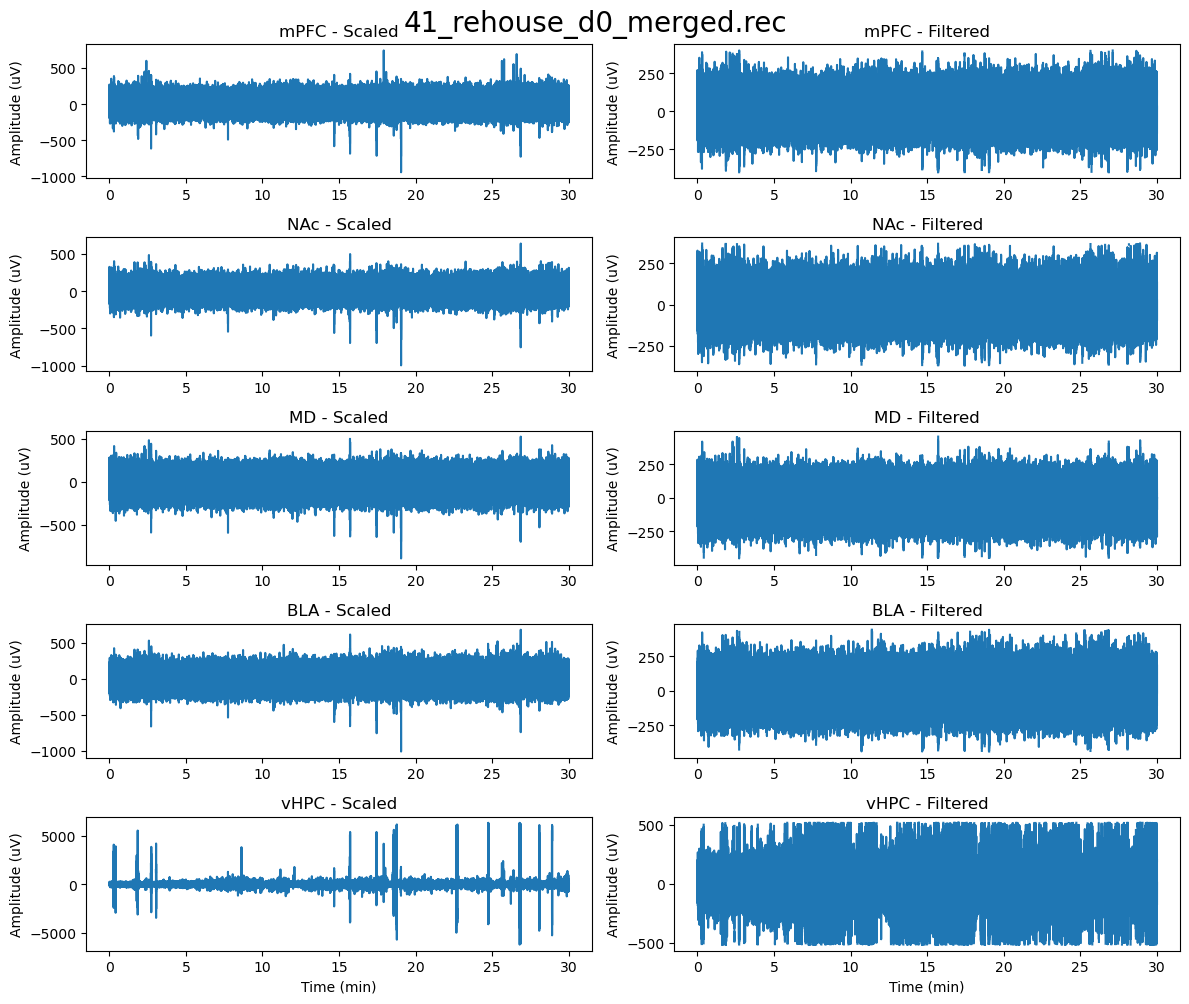

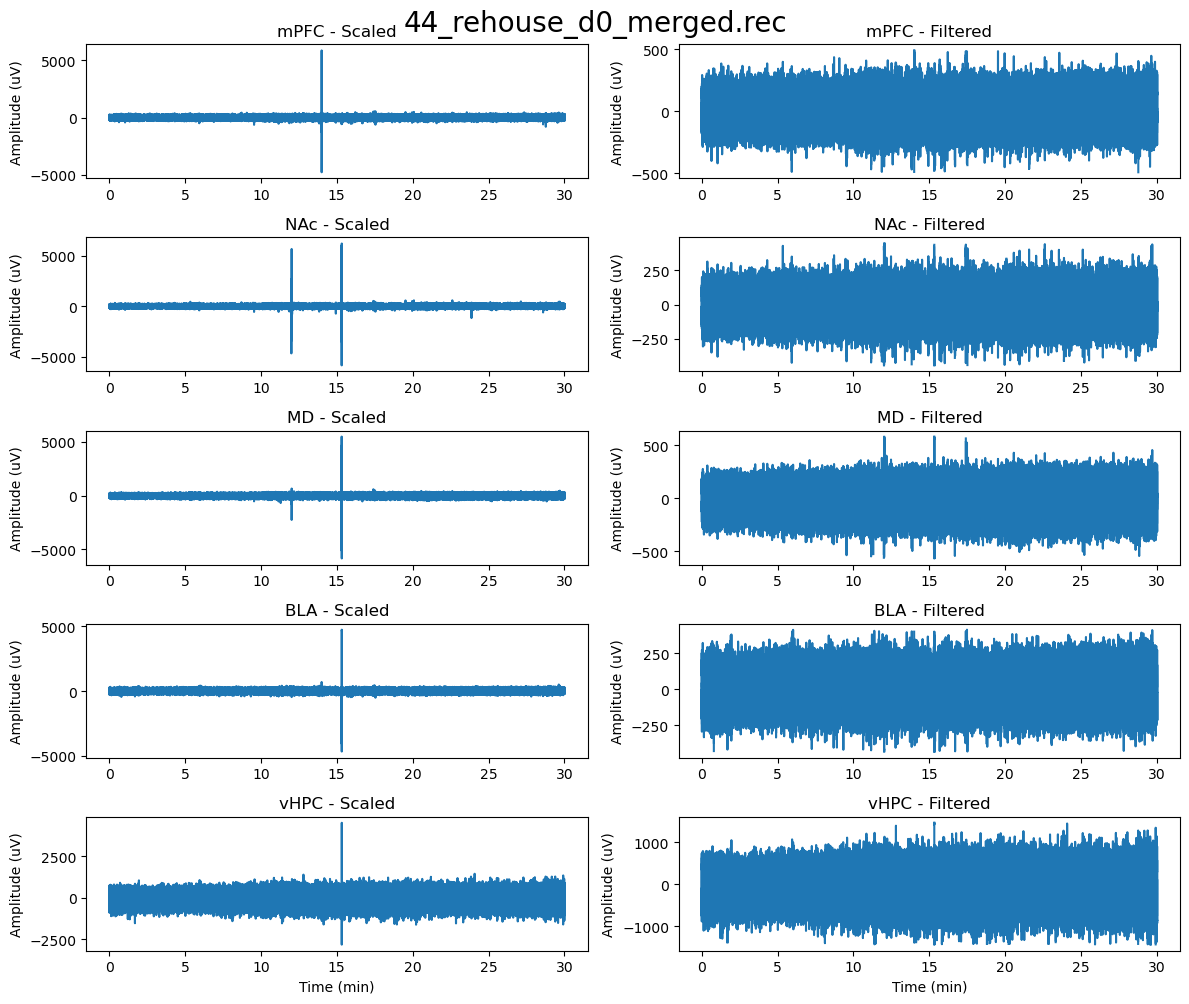

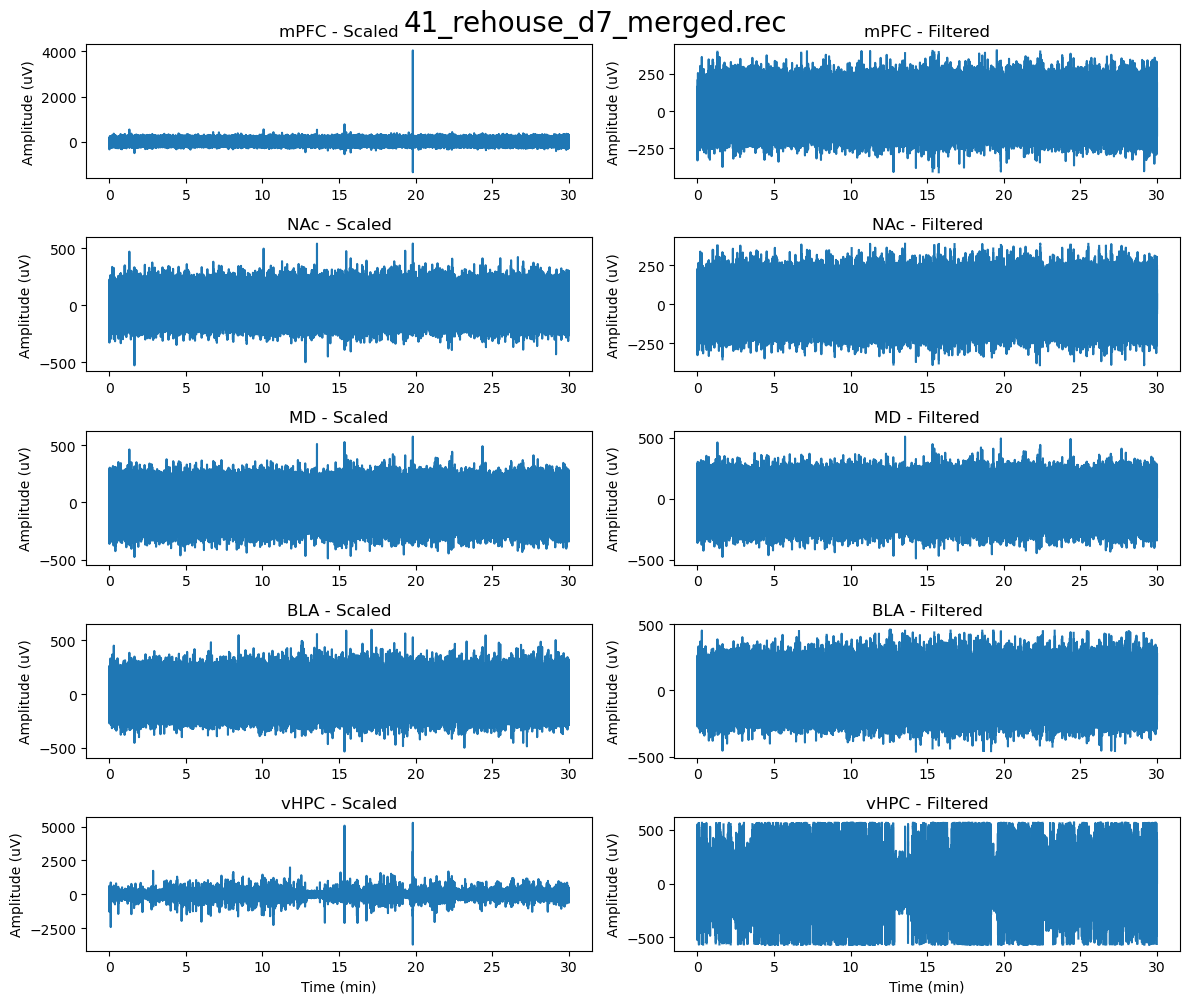

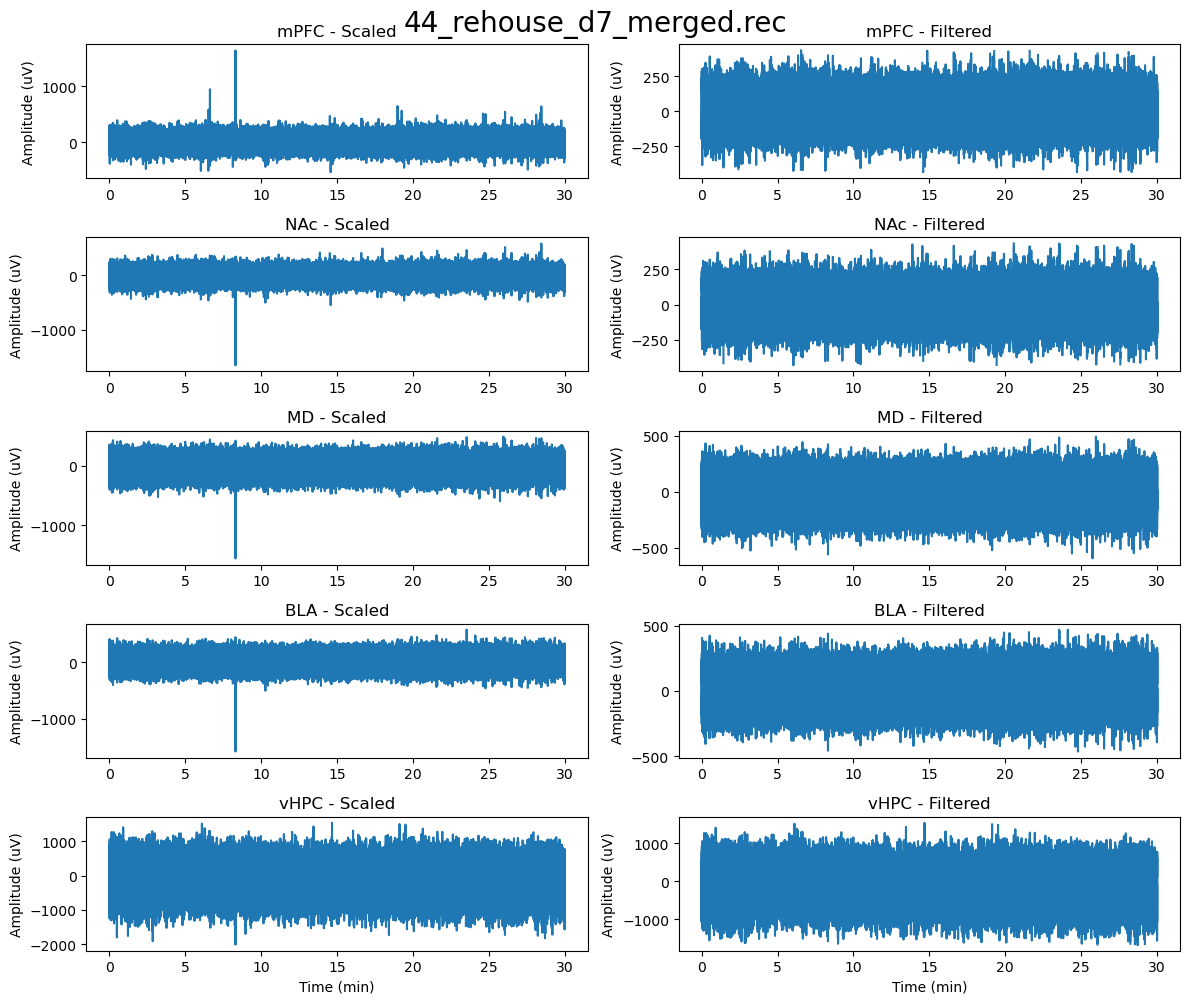

In [136]:
lfp_collection.diagnostic_plots(threshold=5)

Found first timestamp


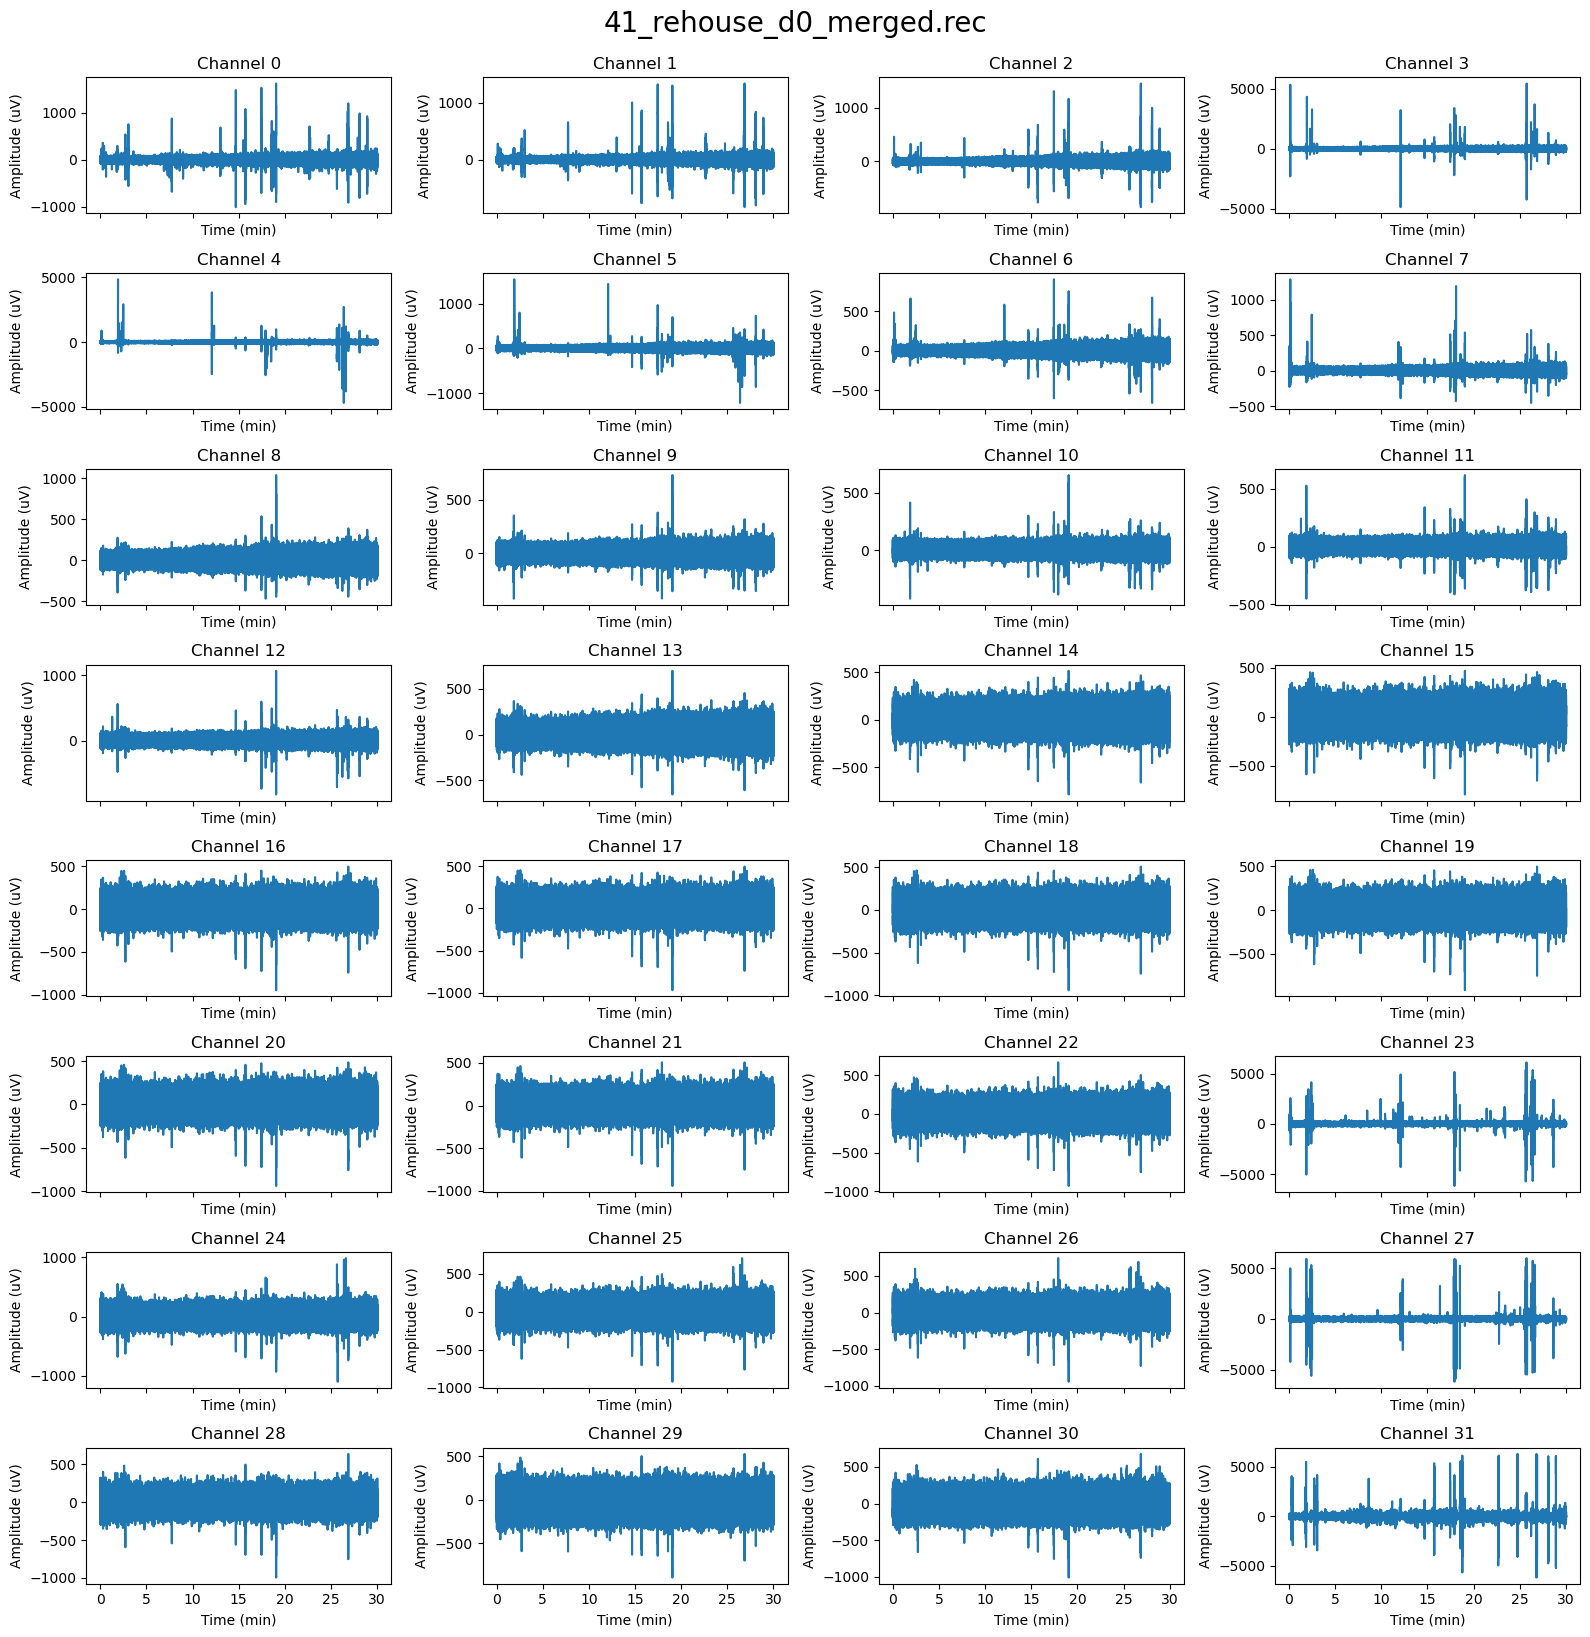

Found first timestamp


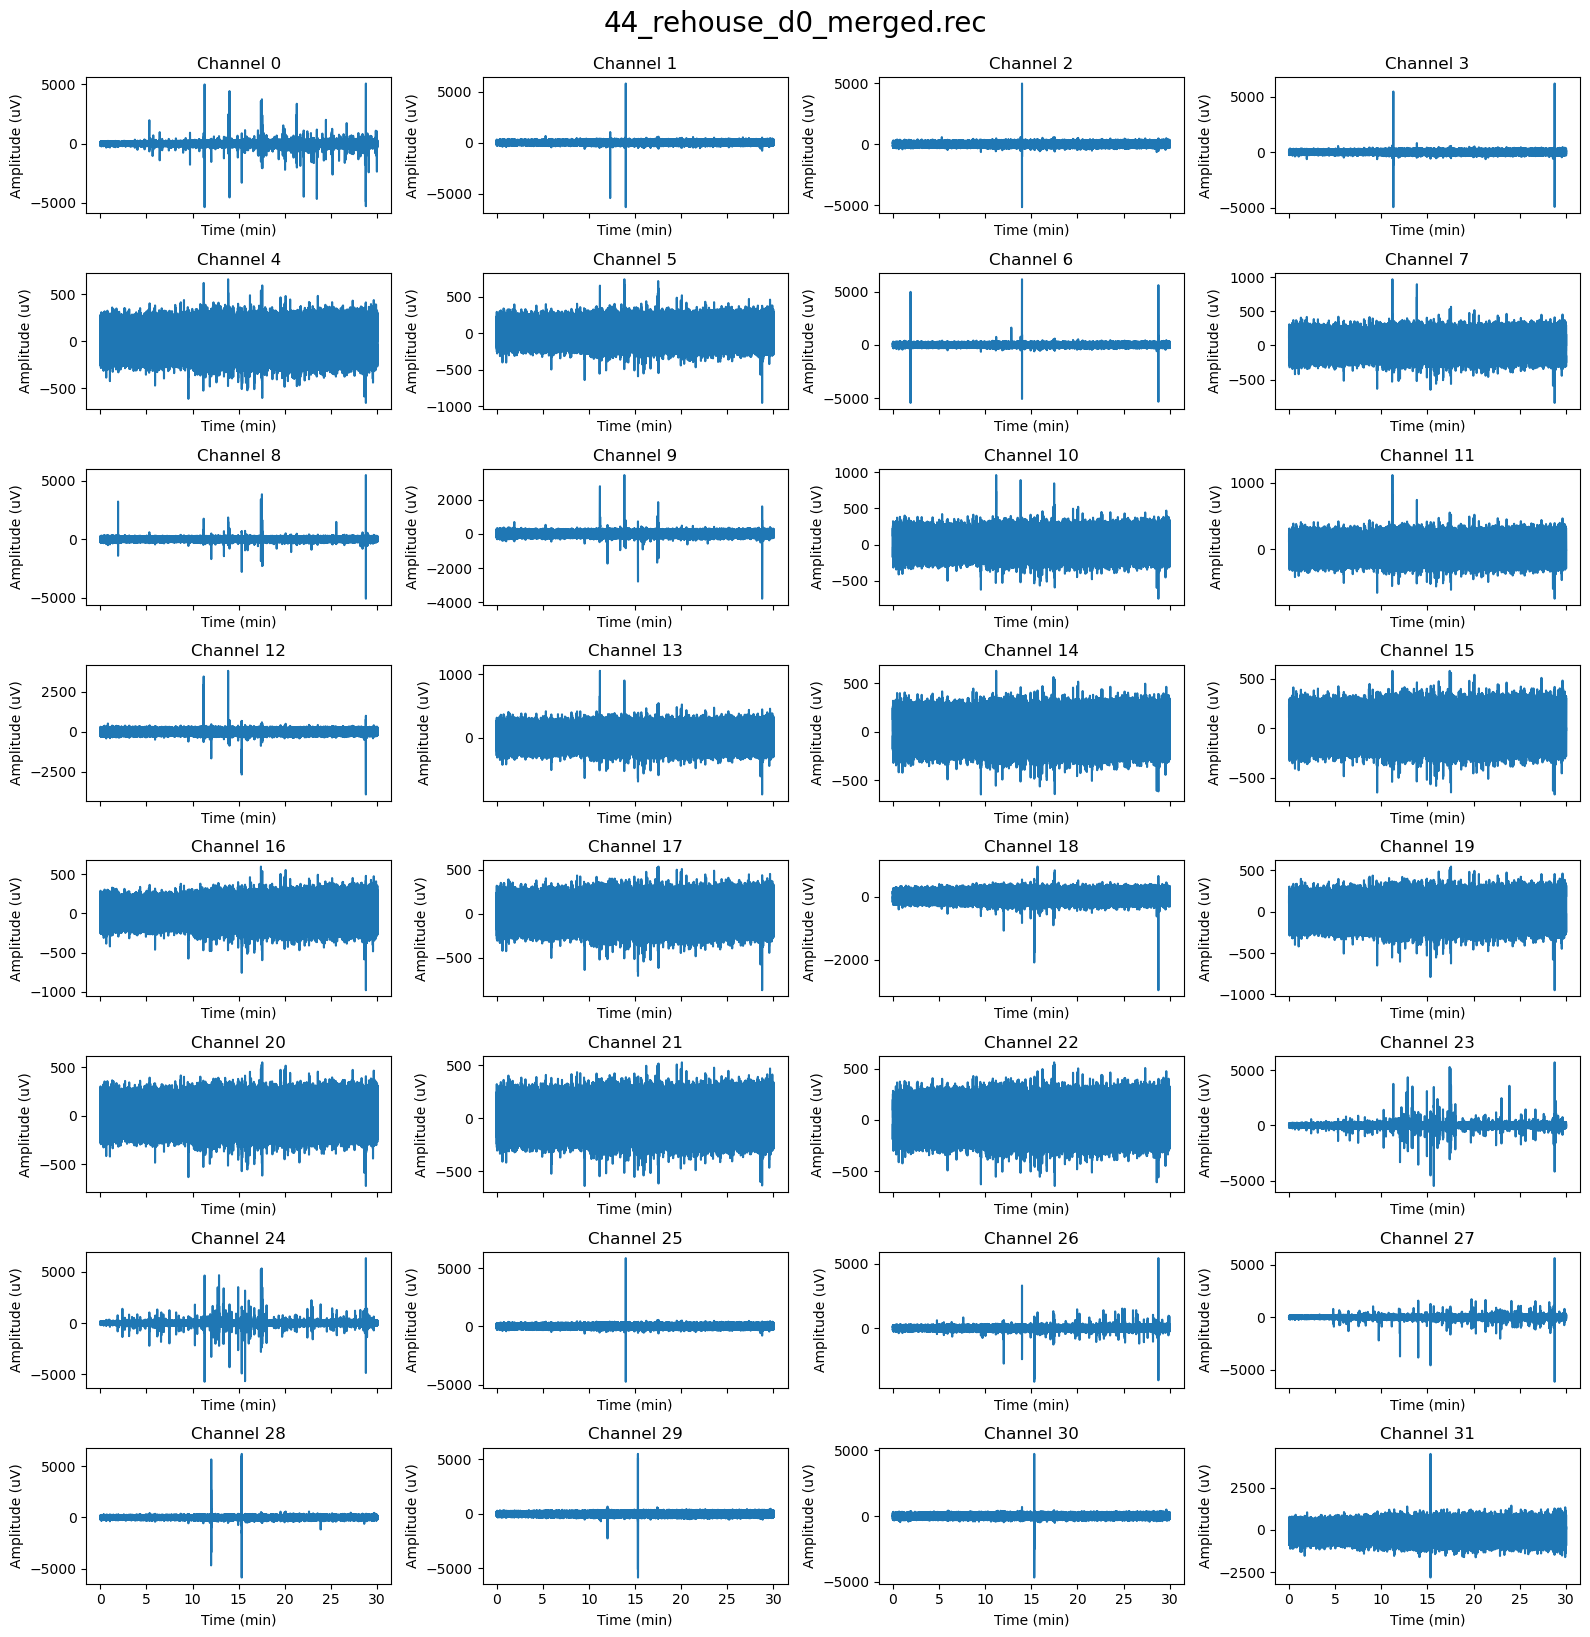

Found first timestamp


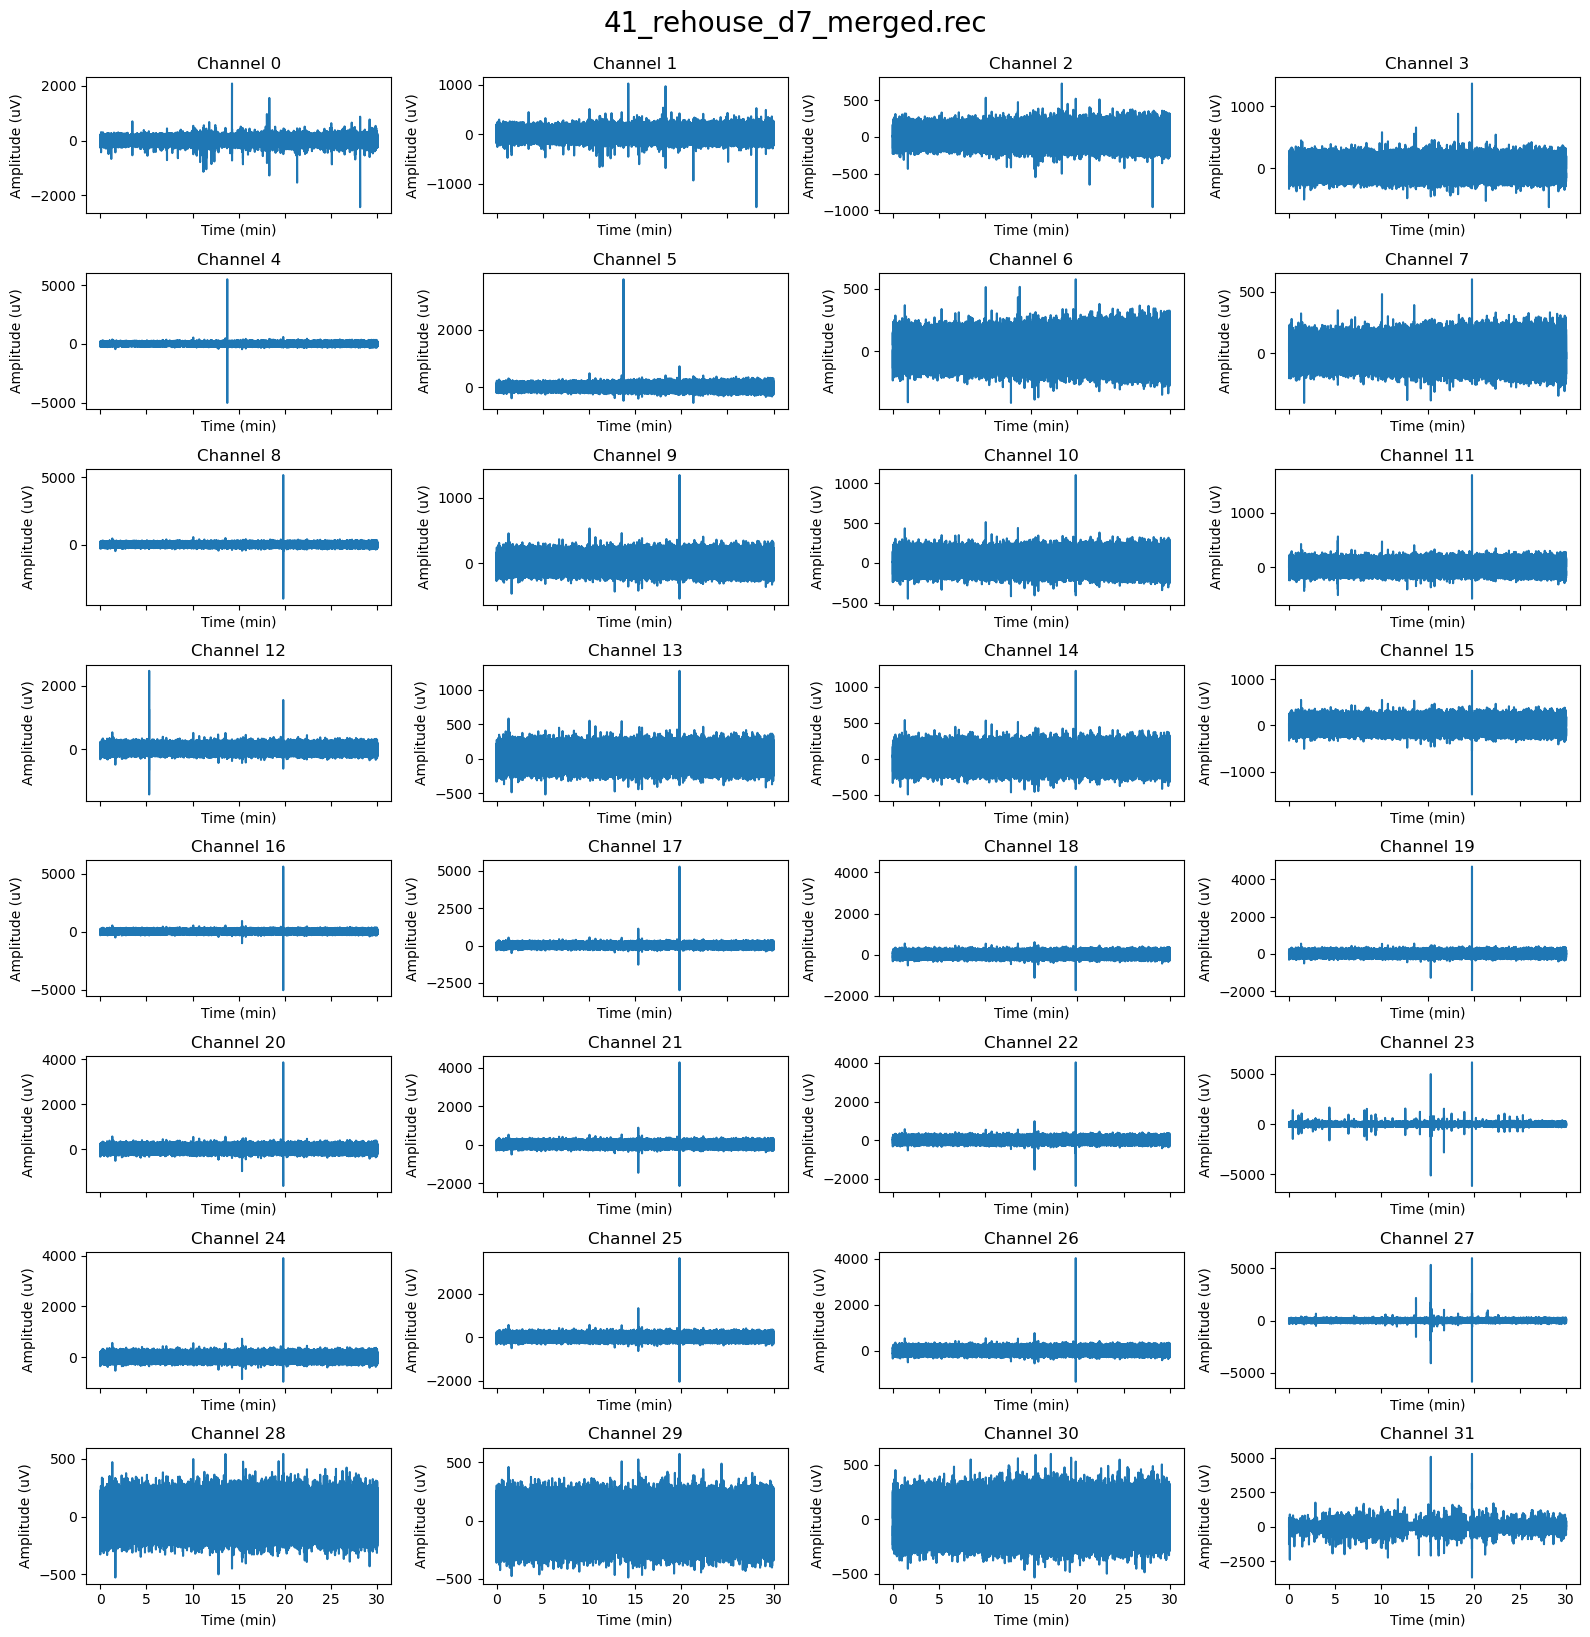

Found first timestamp


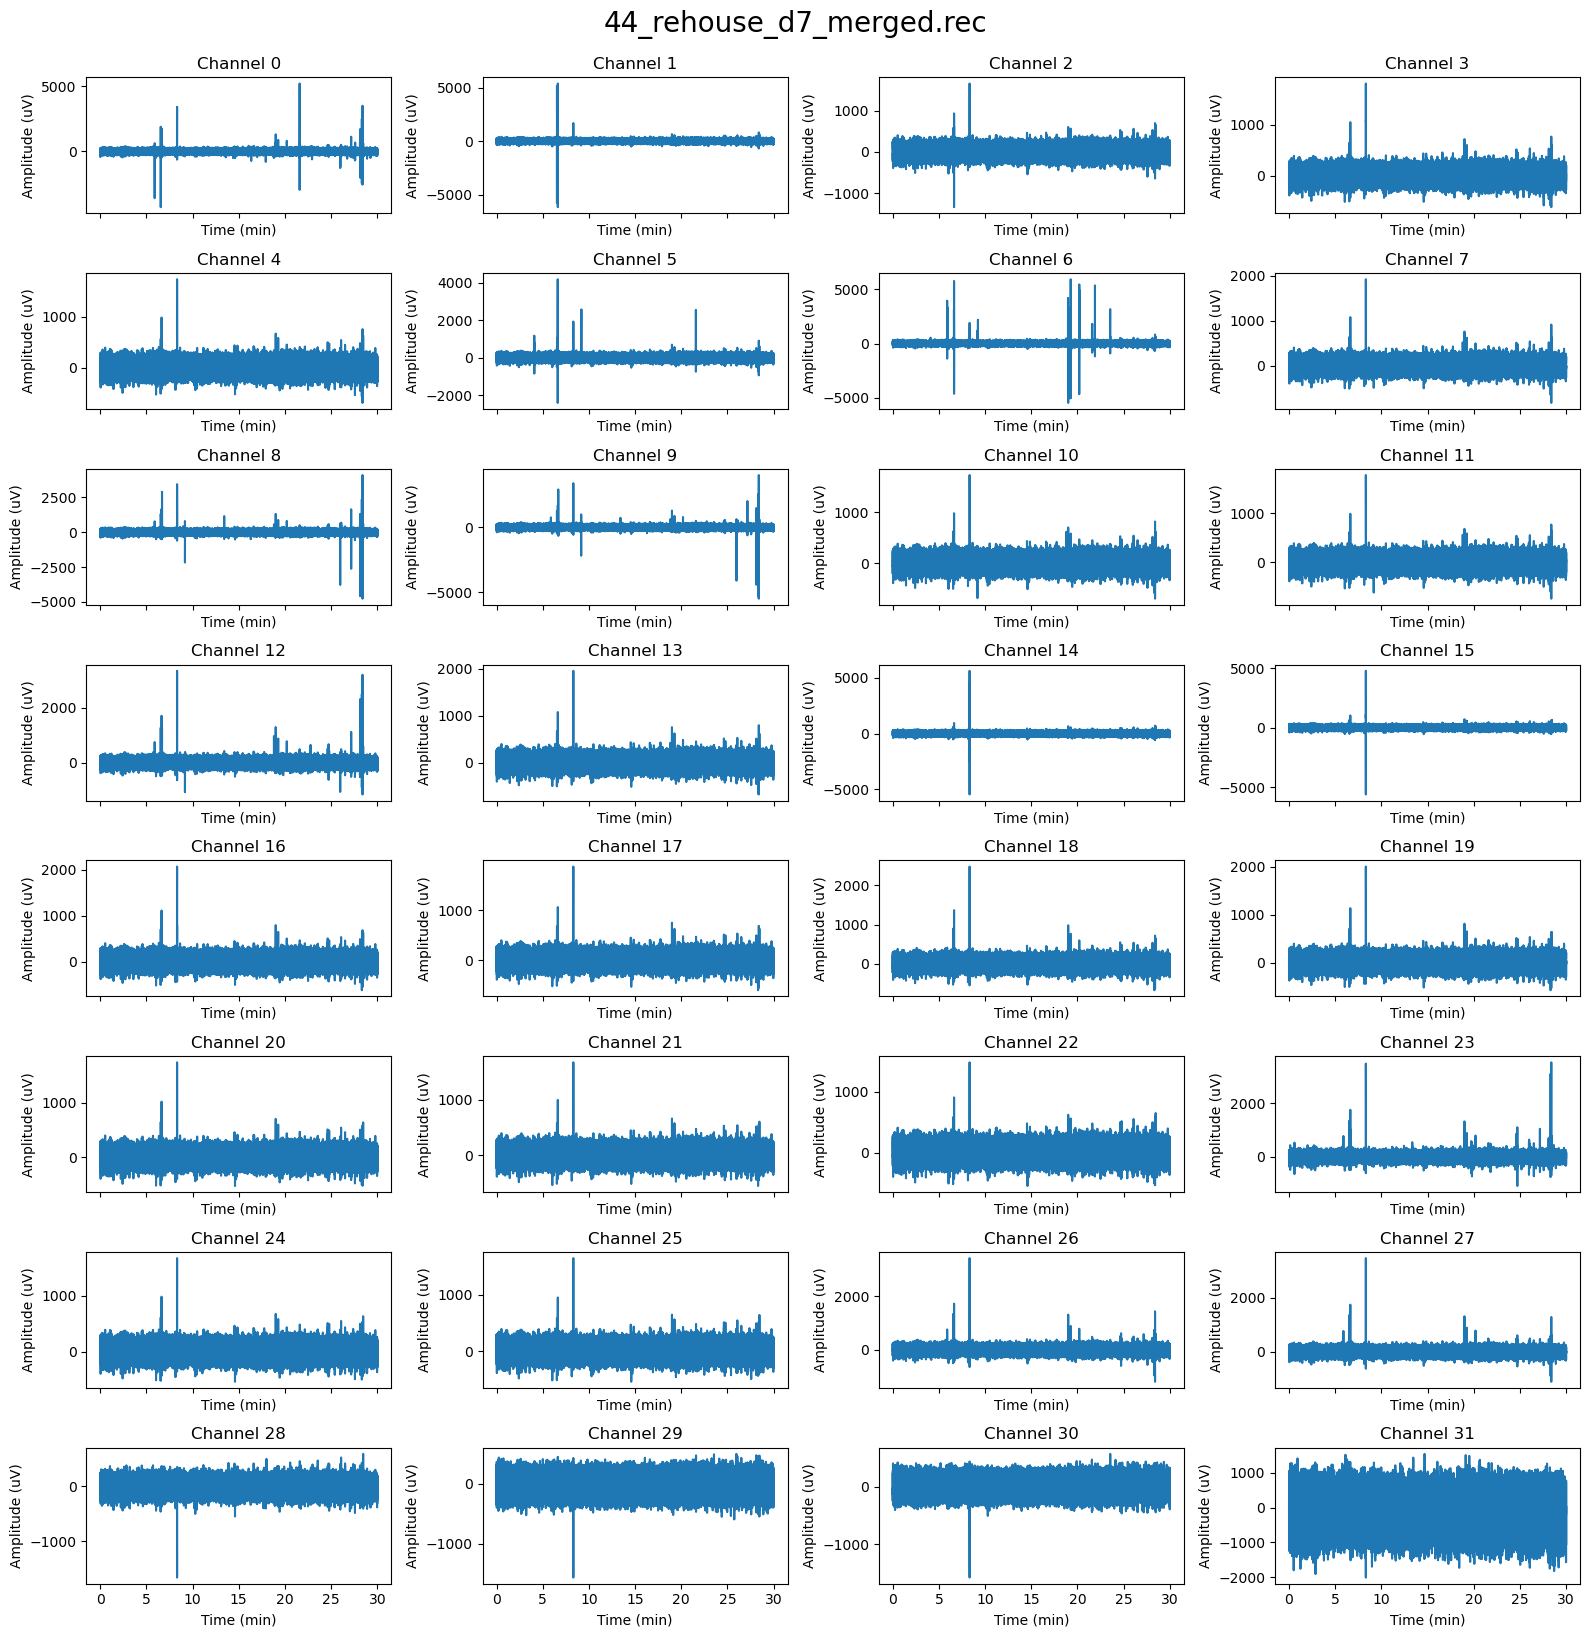

In [137]:
lfp_collection.diagnostic_plots_channel_finder()

### Saving collection to json+h5

In [140]:
from importlib import reload
import LFP.lfp_recording
import LFP.lfp_collection

reload(LFP.lfp_recording)      # <- reload this first!
reload(LFP.lfp_collection)

from LFP.lfp_collection import LFPCollection  # <- re-import class afterward


In [141]:
import json
import os

output_path = "/home/t.heeps/blue_npadillacoreano/npadillacoreano/share/rehouse_data/lfp_collections"

notes = "Rehouse data - d0/d7 for subjs 41/44 - NAc is supposed to be bad for subject 44"

# creating output dir
os.makedirs(output_path, exist_ok=True)

# setting frequencies none so save works, consider changing class later for this to always be true
lfp_collection.frequencies = None


# === Save the collection ===
print(f"Saving LFPCollection to {output_path}...")
LFPCollection.save_to_json(
    lfp_collection,
    output_path=output_path,
    notes=notes,
    filename="shifted_events_44_41"
)
print("✅ LFPCollection saved successfully to JSON + HDF5")


Saving LFPCollection to /home/t.heeps/blue_npadillacoreano/npadillacoreano/share/rehouse_data/lfp_collections...
✅ LFPCollection saved successfully to JSON + HDF5


In [1]:
!jupyter nbconvert --to script lfp_creation.ipynb

[NbConvertApp] WARNING | pattern 'lfp_creation.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
  